## Importing Required Libraries

In [1]:
from sklearn import datasets, neighbors, linear_model
from sklearn.model_selection import train_test_split,KFold, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve,auc,confusion_matrix
import xgboost as xgb
from scipy import interp
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn import metrics ,svm
from sklearn.externals import joblib
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import label_binarize


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Loading Data


In [2]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)

n_samples : 1797


<Figure size 432x288 with 0 Axes>

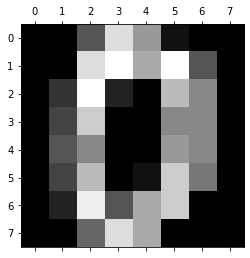

In [3]:
# What's this operation ? 
#Answer
#--->  Normalize the data
X_digits = X_digits / X_digits.max()
n_samples = len(X_digits)
print('n_samples :',n_samples)
# Display the first image:
plt.gray() 
plt.matshow(X_digits[0,:].reshape(8,8)) 
plt.show()

## Splitting Data

In [4]:
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.1, shuffle=False)

### affichage de 64 premiers digits

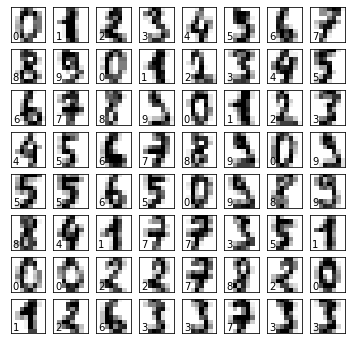

In [5]:
fig=plt.figure(figsize=(6,6))

for i in range(64):
    ax=fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_digits[i,:].reshape(8,8),cmap=plt.cm.binary , interpolation='nearest')
    ax.text(0, 7, str(y_digits[i]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.97        20
           2       1.00      0.94      0.97        18
           3       0.89      0.94      0.91        17
           4       0.95      1.00      0.97        19
           5       1.00      0.90      0.95        20
           6       1.00      1.00      1.00        18
           7       1.00      0.95      0.97        20
           8       0.88      0.94      0.91        16
           9       0.89      1.00      0.94        16

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180

KNeighbors score: 0.961111


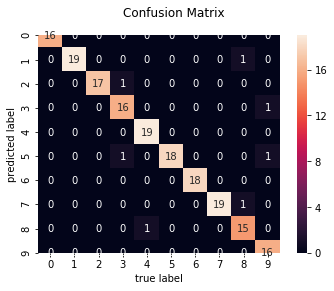

In [6]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print(metrics.classification_report(y_pred, y_test))
print('KNeighbors score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.suptitle("Confusion Matrix")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      1.00      0.94        17
           2       1.00      1.00      1.00        17
           3       0.56      0.91      0.69        11
           4       0.90      1.00      0.95        18
           5       1.00      0.82      0.90        22
           6       1.00      1.00      1.00        18
           7       1.00      0.95      0.97        20
           8       1.00      0.68      0.81        25
           9       0.83      0.94      0.88        16

    accuracy                           0.92       180
   macro avg       0.92      0.93      0.91       180
weighted avg       0.94      0.92      0.92       180

LogisticRegression score: 0.916667

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


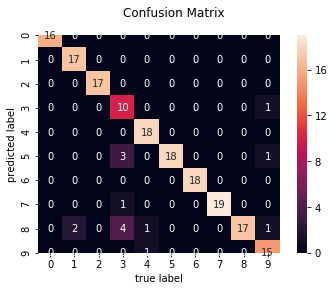

In [7]:
logistic = linear_model.LogisticRegression(max_iter=1000)
logistic.fit(X_train,y_train)

y_pred = logistic.predict(X_test)

print(metrics.classification_report(y_pred, y_test))
print('LogisticRegression score: %f' % logistic.fit(X_train, y_train).score(X_test, y_test))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.suptitle("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00        17
           3       0.72      1.00      0.84        13
           4       0.90      1.00      0.95        18
           5       1.00      0.86      0.92        21
           6       1.00      1.00      1.00        18
           7       1.00      0.86      0.93        22
           8       0.88      0.79      0.83        19
           9       0.89      1.00      0.94        16

    accuracy                           0.94       180
   macro avg       0.94      0.95      0.94       180
weighted avg       0.95      0.94      0.94       180

RondomForest score: 0.938889


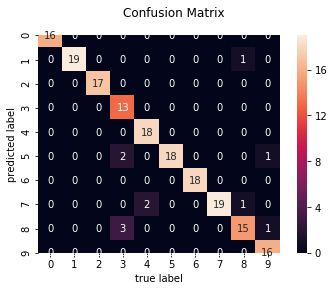

In [8]:
RF_c = RandomForestClassifier(n_estimators=1000)
RF_c.fit(X_train,y_train)

y_pred = RF_c.predict(X_test)


print(metrics.classification_report(y_pred, y_test))
print('RondomForest score: %f' % RF_c.fit(X_train, y_train).score(X_test, y_test))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.suptitle("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.84      0.80      0.82        20
           2       0.76      0.93      0.84        14
           3       0.44      1.00      0.62         8
           4       0.80      1.00      0.89        16
           5       0.89      0.73      0.80        22
           6       1.00      0.95      0.97        19
           7       0.84      0.62      0.71        26
           8       0.76      0.52      0.62        25
           9       0.78      1.00      0.88        14

    accuracy                           0.81       180
   macro avg       0.81      0.85      0.81       180
weighted avg       0.84      0.81      0.81       180

GaussianNB score: 0.811111


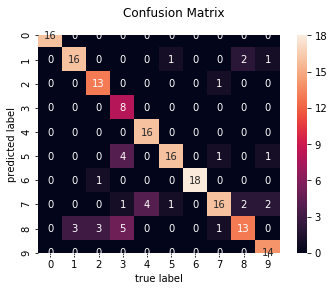

In [9]:
NB_c = GaussianNB()
NB_c.fit(X_train,y_train)

y_pred = NB_c.predict(X_test)



print(metrics.classification_report(y_pred, y_test))
print('GaussianNB score: %f' % NB_c.fit(X_train, y_train).score(X_test, y_test))



mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.suptitle("Confusion Matrix")
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00        17
           3       0.56      0.91      0.69        11
           4       0.90      1.00      0.95        18
           5       1.00      0.82      0.90        22
           6       1.00      1.00      1.00        18
           7       1.00      0.90      0.95        21
           8       0.94      0.73      0.82        22
           9       0.83      1.00      0.91        15

    accuracy                           0.92       180
   macro avg       0.92      0.93      0.92       180
weighted avg       0.94      0.92      0.93       180



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


svm score: 0.922222


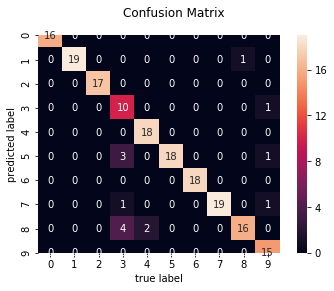

In [10]:
svm_c = svm.SVC()
svm_c.fit(X_train,y_train)

y_pred = svm_c.predict(X_test)


print(metrics.classification_report(y_pred, y_test))
print('svm score: %f' % svm_c.fit(X_train, y_train).score(X_test, y_test))



mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.suptitle("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.79      0.71      0.75        21
           2       0.76      0.81      0.79        16
           3       0.44      0.57      0.50        14
           4       0.90      0.86      0.88        21
           5       0.89      0.84      0.86        19
           6       0.83      0.79      0.81        19
           7       0.84      0.84      0.84        19
           8       0.71      0.67      0.69        18
           9       0.83      0.88      0.86        17

    accuracy                           0.80       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.81      0.80      0.80       180

Decision Tree score: 0.800000


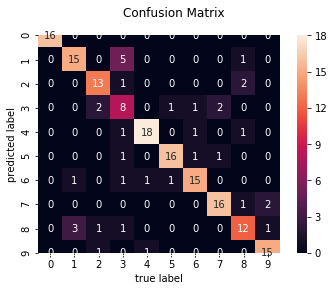

In [11]:
DT_c = DecisionTreeClassifier()
DT_c.fit(X_train,y_train)

y_pred = DT_c.predict(X_test)



print(metrics.classification_report(y_pred, y_test))
print('Decision Tree score: %f' % DT_c.fit(X_train, y_train).score(X_test, y_test))


mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.suptitle("Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.83      0.90        23
           2       0.94      1.00      0.97        16
           3       0.67      1.00      0.80        12
           4       0.90      0.95      0.92        19
           5       0.94      0.89      0.92        19
           6       0.94      1.00      0.97        17
           7       0.95      0.95      0.95        19
           8       0.88      0.75      0.81        20
           9       0.89      0.84      0.86        19

    accuracy                           0.91       180
   macro avg       0.91      0.92      0.91       180
weighted avg       0.92      0.91      0.91       180



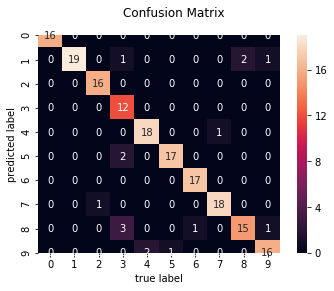

Gradient Boosting score: 0.911111


In [12]:
GB_c = GradientBoostingClassifier()
GB_c.fit(X_train,y_train)

y_pred = GB_c.predict(X_test)



print(metrics.classification_report(y_pred, y_test))


mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.suptitle("Confusion Matrix")
plt.show()
print('Gradient Boosting score: %f' % GB_c.fit(X_train, y_train).score(X_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.90      0.95        21
           2       1.00      1.00      1.00        17
           3       0.67      1.00      0.80        12
           4       0.90      1.00      0.95        18
           5       1.00      0.82      0.90        22
           6       1.00      1.00      1.00        18
           7       1.00      0.95      0.97        20
           8       0.94      0.84      0.89        19
           9       0.89      0.94      0.91        17

    accuracy                           0.94       180
   macro avg       0.94      0.95      0.94       180
weighted avg       0.95      0.94      0.94       180



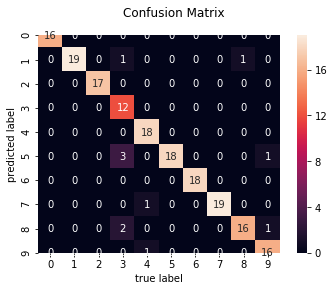

XG Boosting score: 0.938889


In [13]:
XGB_c = xgb.XGBClassifier(n_jobs=1)
XGB_c.fit(X_train,y_train)

y_pred = XGB_c.predict(X_test)



print(metrics.classification_report(y_pred, y_test))


mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.suptitle("Confusion Matrix")
plt.show()

print('XG Boosting score: %f' % XGB_c.fit(X_train, y_train).score(X_test, y_test))


In [14]:
print(LogisticRegression().get_params())
print(KNeighborsClassifier().get_params())
print(RandomForestClassifier().get_params())
print(GaussianNB().get_params())
print(SVC().get_params())
print(DecisionTreeClassifier().get_params())
print(GradientBoostingClassifier().get_params())
print(xgb.XGBClassifier().get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
{'priors': None, 'var_smoothing': 1e-09}
{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel'

## K-fold cross-validation et GridSearchCV


In [15]:
# K-fold cross-validation et GridSearchCV
pipelines = []
params = []
names = []


# ajouter LogisticRegression
pipelines.append(Pipeline([('clf', LogisticRegression())])) ### LogisticRegression
params.append({'clf__C':[200,500,1000]})
names.append('LogisticRegression')
 

# ajouter RandomForestClassifier
pipelines.append(Pipeline([('clf', RandomForestClassifier())])) ## RandomForestClassifier
params.append({'clf__n_estimators': [200,700,1200]})
names.append('RandomForestClassifier')

# ajouter GaussianNB
pipelines.append(Pipeline([('clf', GaussianNB())])) ## GaussianNB
params.append({'clf__var_smoothing': [1e-09, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4,1e-3,1e-2,0.1]}) #[1e-09, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4,1e-3,1e-2,0.1]
names.append('Naive Bayes')


#decision_function_shape='ovo'
# ajouter DecisionTreeClassifier
pipelines.append(Pipeline([('clf', DecisionTreeClassifier())])) ## DecisionTreeClassifier
params.append({'clf__max_depth': [71,75,76,90]})
names.append('DecisionTreeClassifier')

# ajouter GradientBoostingClassifier
pipelines.append(Pipeline([('clf', GradientBoostingClassifier())])) ## GradientBoostingClassifier
params.append({'clf__n_estimators' :[100,150,200,500]})
names.append('GradientBoostingClassifier')

# ajouter XGBClassifier
pipelines.append(Pipeline([('clf', xgb.XGBClassifier())])) ## XGBClassifier
params.append({'clf__n_jobs': [1,2,3]})
              
names.append('XGBClassifier')

# ajouter svm
pipelines.append(Pipeline([('clf', svm.SVC())])) ## svm
params.append({'clf__gamma':[1e-1,1e-2,1e-3]})
names.append('svm')


# ajouter KNeighborsClassifier
pipelines.append(Pipeline([('clf', KNeighborsClassifier())])) ## KNeighborsClassifier
params.append({'clf__n_neighbors': [3,5,8]})
names.append('KNeighborsClassifier')


In [16]:
# l'enraînement avec cross-validation

#n_jobs = -1 signifie que le calcul sera distribué sur tous les CPU de l'ordinateur.


def model(pipeline, parameters, name, X_digits, y_digits):    
    cv = KFold(n_splits=5, shuffle=True, random_state=32)
    grid_obj = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_obj.fit(X_digits,y_digits)  
    print(name, 'accuracy:', grid_obj.best_score_)
    print(name, ':', grid_obj.best_params_)
    estimator = grid_obj.best_estimator_
    estimator.fit(X_digits,y_digits) # training sur tout training dataset
    return estimator

estimators = []
for i in range(len(pipelines)):    
    estimators.append(model(pipelines[i], params[i], names[i], X_train, y_train))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression accuracy: 0.95856524427953
LogisticRegression : {'clf__C': 200}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


RandomForestClassifier accuracy: 0.9752628324056896
RandomForestClassifier : {'clf__n_estimators': 700}
Naive Bayes accuracy: 0.9214594928880643
Naive Bayes : {'clf__var_smoothing': 0.1}
DecisionTreeClassifier accuracy: 0.8429189857761287
DecisionTreeClassifier : {'clf__max_depth': 71}
GradientBoostingClassifier accuracy: 0.9635126777983921
GradientBoostingClassifier : {'clf__n_estimators': 100}
XGBClassifier accuracy: 0.9573283858998145
XGBClassifier : {'clf__n_jobs': 1}
svm accuracy: 0.9851576994434137
svm : {'clf__gamma': 0.1}
KNeighborsClassifier accuracy: 0.987012987012987
KNeighborsClassifier : {'clf__n_neighbors': 3}


 ## best estimator c'est KNeighbors qui a occuracy le plus élevé occuracy = 0.987 avec best hyperparametre n_neighbors=3 

In [17]:
# Evaluation

for i, estimator in enumerate(estimators):
    bestmodel=estimators[7]
    
    
print('best model :', bestmodel)

best model : Pipeline(memory=None,
         steps=[('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.1, shuffle=False)

bestmodel.fit(X_train,y_train)

y_pred = bestmodel.predict(X_test)
# accuracy  Precision, Recall, F-score
print(metrics.classification_report(
                                    y_test,
                                    y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      1.00      0.97        19
           2       0.94      1.00      0.97        17
           3       0.94      0.89      0.91        18
           4       1.00      0.95      0.97        20
           5       0.90      1.00      0.95        18
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        19
           8       1.00      0.94      0.97        17
           9       0.94      0.89      0.91        18

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



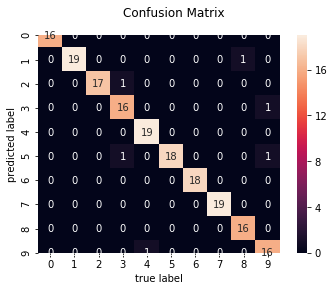

In [19]:
# confusion matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.suptitle("Confusion Matrix")
plt.show()

In [20]:
n_samples = len(X_digits)
n_classes = len(set(y_digits))

Y = label_binarize(y_digits, classes=[*range(n_classes)])
X_train, X_test, y_train, y_test = train_test_split(X_digits,
                                                    Y,
                                                    random_state = 42)

clf = OneVsRestClassifier(KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))
clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)


## precision recall curve and PR auc


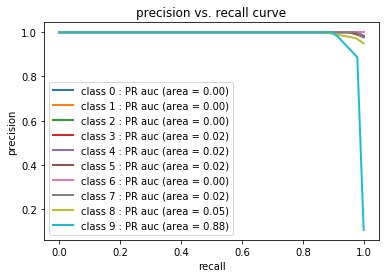

In [21]:
precision = dict()
recall = dict()
pr_auc = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    pr_auc[i]=auc(precision[i], recall[i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i)+' : PR auc (area = %0.2f)' % pr_auc[i])
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

## roc curve and AUC-ROC 

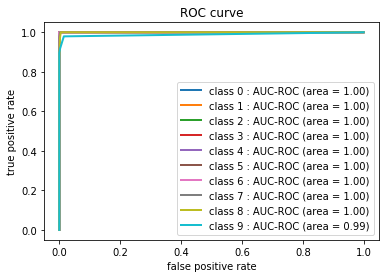

In [22]:

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i)+' : AUC-ROC (area = %0.2f)' % roc_auc[i])

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

## Deploy the best model

In [23]:

joblib.dump(bestmodel, 'KNeighborsClassifier.pkl')
    

['KNeighborsClassifier.pkl']